In [1]:
# Formatting
%reload_ext nb_black

<IPython.core.display.Javascript object>

In this notebook, I will be investigating the Anime Recommendations Database. This dataset can be found on Kaggle - https://www.kaggle.com/CooperUnion/anime-recommendations-database

In [2]:
# Imports for dataset operations
import pandas as pd
import numpy as np

# Imports for visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# For performing stats tests
from scipy import stats
from statsmodels.stats.multitest import multipletests

<IPython.core.display.Javascript object>

In [3]:
# Formatting
%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
# Defining function for calculating the 95% confidence interval
def get_95_ci(x1, x2):
    """Calculate a 95% CI for 2 1d numpy arrays"""
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return ci_lo, ci_hi

<IPython.core.display.Javascript object>

In [5]:
# Create the DataFrame and check the head of the dataset
df = pd.read_csv("data/anime.csv")

<IPython.core.display.Javascript object>

In [6]:
# df.sort_values(by=["rating"], ascending=False)
df.head(4)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572


<IPython.core.display.Javascript object>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


<IPython.core.display.Javascript object>

In [8]:
df["type"].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

<IPython.core.display.Javascript object>

Now that the data has been reviewed, it's time to zoom in to what we are interested in and try to clean up the data so it is ready for statistical testing.

In [9]:
# Filter to desired type of anime for analysis
tv_anime = df[df["type"] == "TV"]
tv_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3787 entries, 1 to 11111
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  3787 non-null   int64  
 1   name      3787 non-null   object 
 2   genre     3777 non-null   object 
 3   type      3787 non-null   object 
 4   episodes  3787 non-null   object 
 5   rating    3671 non-null   float64
 6   members   3787 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 236.7+ KB


<IPython.core.display.Javascript object>

In [10]:
# Remove null values
tv_anime = tv_anime[~tv_anime["rating"].isna()]
tv_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 1 to 10895
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  3671 non-null   int64  
 1   name      3671 non-null   object 
 2   genre     3668 non-null   object 
 3   type      3671 non-null   object 
 4   episodes  3671 non-null   object 
 5   rating    3671 non-null   float64
 6   members   3671 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 229.4+ KB


<IPython.core.display.Javascript object>

In [11]:
# Filter out anime with unknown number of episodes
tv_anime = tv_anime[tv_anime["episodes"] != "Unknown"]
tv_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3570 entries, 1 to 10895
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  3570 non-null   int64  
 1   name      3570 non-null   object 
 2   genre     3568 non-null   object 
 3   type      3570 non-null   object 
 4   episodes  3570 non-null   object 
 5   rating    3570 non-null   float64
 6   members   3570 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 223.1+ KB


<IPython.core.display.Javascript object>

In [12]:
# Convert string data type into integer
tv_anime["episodes"] = tv_anime["episodes"].astype(int)

<IPython.core.display.Javascript object>

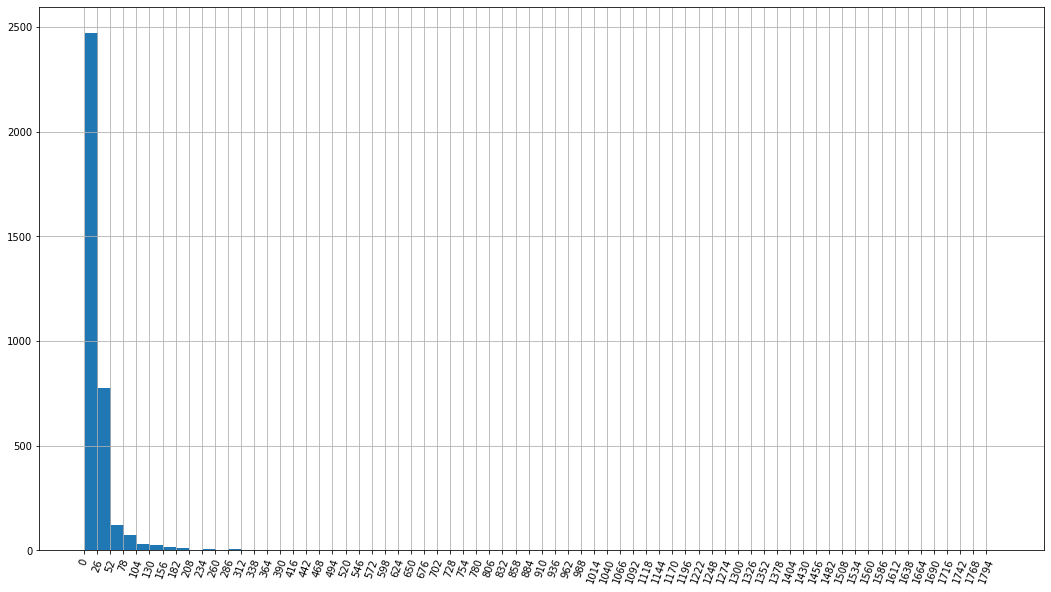

<IPython.core.display.Javascript object>

In [13]:
tv_anime["episodes"].hist(figsize=(18, 10), bins=70)
x_ticks = np.arange(0, 1819, 26)
plt.xticks(x_ticks, rotation=70)
plt.show()

In [14]:
tv_anime["episodes"].max()

1818

<IPython.core.display.Javascript object>

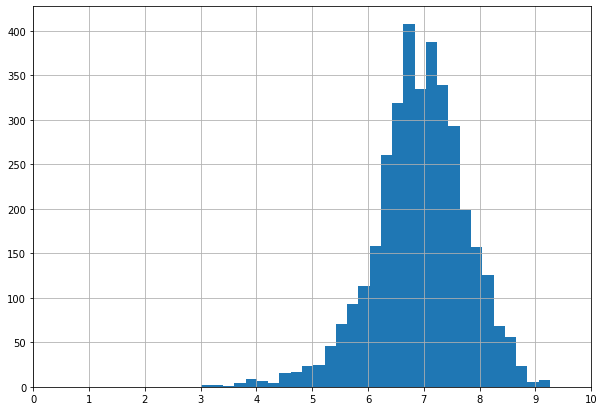

<IPython.core.display.Javascript object>

In [15]:
tv_anime["rating"].hist(figsize=(10, 7), bins=31)
x_ticks = np.arange(0, 11, 1)
plt.xticks(x_ticks)
plt.show()

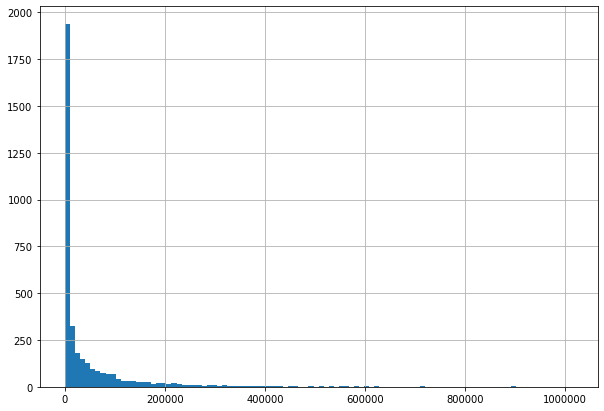

<IPython.core.display.Javascript object>

In [16]:
tv_anime["members"].hist(figsize=(10, 7), bins=100)
plt.show()

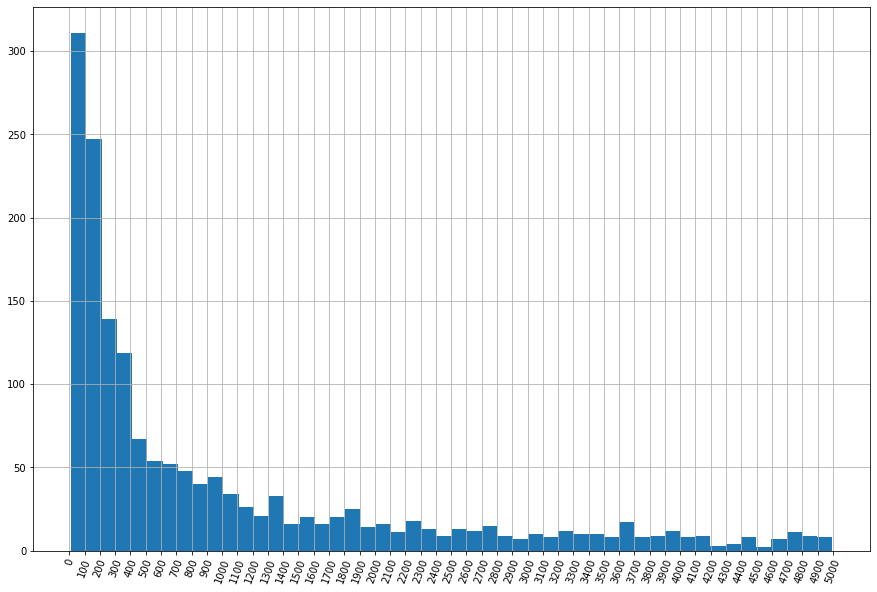

<IPython.core.display.Javascript object>

In [17]:
# same as last graph but zooming in on data with 5000 or less members
tv_anime_low_members = tv_anime[tv_anime["members"] <= 5000]
tv_anime_low_members["members"].hist(figsize=(15, 10), bins=50)
x_ticks = np.arange(0, 5001, 100)
plt.xticks(x_ticks, rotation=70)
plt.show()

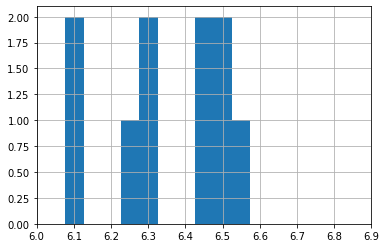

<IPython.core.display.Javascript object>

In [18]:
# check mean rating for anime with low members
bin = 50
bump = 50
means = []
for _ in range(10):

    df1 = tv_anime[tv_anime["members"] < bin]
    n1 = len(df1.index)
    sum1 = df1["rating"].sum()

    bin += bump

    df2 = tv_anime[tv_anime["members"] < bin]
    n2 = len(df2.index)
    sum2 = df2["rating"].sum()

    n_bin = n2 - n1
    sum_bin_rating = sum2 - sum1

    mean_bin_rating = sum_bin_rating / n_bin

    means.append(mean_bin_rating)
    # print(mean_bin_rating)

df_means = pd.DataFrame({"means": means})
df_means["means"].hist(bins=10)
x_ticks = np.arange(6, 7, 0.1)
plt.xticks(x_ticks)
plt.show()

Recommed that anime with less than 500 members be removed from data because 

In [19]:
# Separate groups of anime by how many episodes they have
# tv_anime.loc[tv_anime["episodes"].between(12, 26), "one_season"] = "less"
tv_anime.loc[tv_anime["episodes"] <= 26, "one_season"] = "less"
tv_anime.loc[tv_anime["episodes"] > 26, "one_season"] = "more"

<IPython.core.display.Javascript object>

In [49]:
# Trying removing anime with less than 500 members
tv_anime = tv_anime[tv_anime["members"] >= 250]

<IPython.core.display.Javascript object>

In [50]:
tv_anime_less_ep = tv_anime[tv_anime["one_season"] == "less"]
tv_anime_more_ep = tv_anime[tv_anime["one_season"] == "more"]

<IPython.core.display.Javascript object>

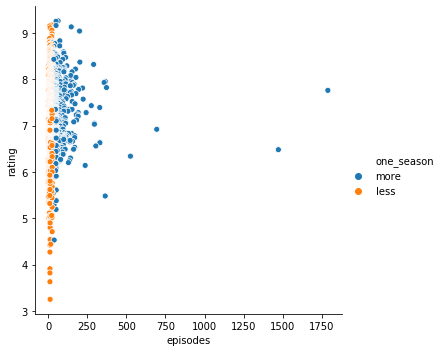

<IPython.core.display.Javascript object>

In [51]:
sns.relplot(x="episodes", y="rating", hue="one_season", data=tv_anime)
# plt.figure(figsize=(16, 6))
plt.show()

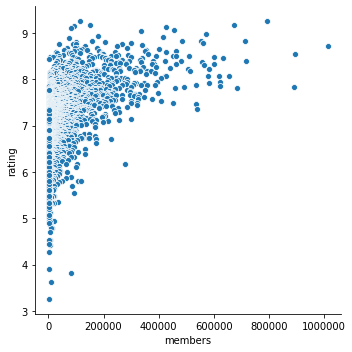

<IPython.core.display.Javascript object>

In [52]:
# Do animes with higher rating also have more fans?
# We can look at a scatter plot of anime group members vs the animes rating
sns.relplot(x="members", y="rating", data=tv_anime)

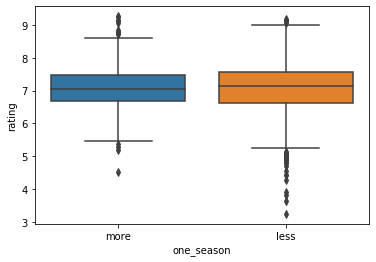

<IPython.core.display.Javascript object>

In [53]:
sns.boxplot(x="one_season", y="rating", data=tv_anime)
plt.show()

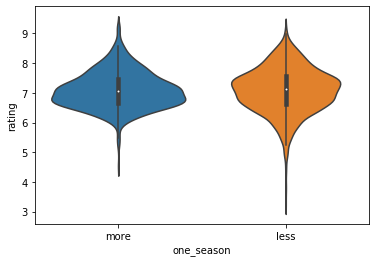

<IPython.core.display.Javascript object>

In [54]:
sns.violinplot(x="one_season", y="rating", data=tv_anime)
plt.show()

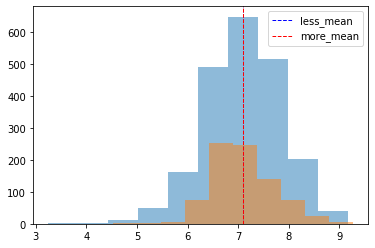

<IPython.core.display.Javascript object>

In [55]:
less_mean = tv_anime_less_ep["rating"].mean()
more_mean = tv_anime_more_ep["rating"].mean()
plt.hist(tv_anime_less_ep["rating"], label="Less/Equal One Season", alpha=0.5)
plt.hist(tv_anime_more_ep["rating"], label="More Than One Season", alpha=0.5)
less_mean_line = plt.axvline(less_mean, color="b", linestyle="dashed", linewidth=1)
more_mean_line = plt.axvline(more_mean, color="r", linestyle="dashed", linewidth=1)
plt.legend(
    (
        less_mean_line,
        more_mean_line,
    ),
    ("less_mean", "more_mean"),
)
plt.show()


# plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)

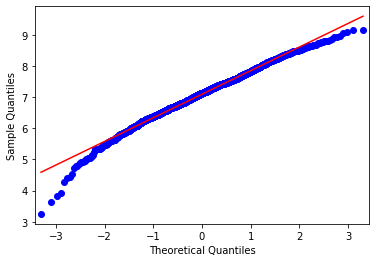

<IPython.core.display.Javascript object>

In [56]:
qqplot(tv_anime_less_ep["rating"], line="s")
plt.show()

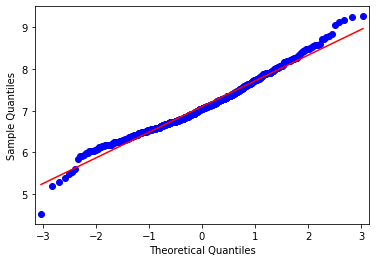

<IPython.core.display.Javascript object>

In [57]:
qqplot(tv_anime_more_ep["rating"], line="s")
plt.show()

In [58]:
stats.describe(tv_anime_less_ep["rating"])

DescribeResult(nobs=2125, minmax=(3.25, 9.17), mean=7.095392941176471, variance=0.5743561190650271, skewness=-0.38153622825464123, kurtosis=0.7856711876838198)

<IPython.core.display.Javascript object>

In [59]:
stats.describe(tv_anime_more_ep["rating"])

DescribeResult(nobs=830, minmax=(4.53, 9.26), mean=7.098951807228916, variance=0.3779867166131353, skewness=0.3846050449433052, kurtosis=0.6674010861771693)

<IPython.core.display.Javascript object>

In [60]:
tv_anime_less_ep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2125 entries, 3 to 10874
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    2125 non-null   int64  
 1   name        2125 non-null   object 
 2   genre       2124 non-null   object 
 3   type        2125 non-null   object 
 4   episodes    2125 non-null   int32  
 5   rating      2125 non-null   float64
 6   members     2125 non-null   int64  
 7   one_season  2125 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 141.1+ KB


<IPython.core.display.Javascript object>

In [61]:
tv_anime_more_ep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 1 to 10747
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    830 non-null    int64  
 1   name        830 non-null    object 
 2   genre       830 non-null    object 
 3   type        830 non-null    object 
 4   episodes    830 non-null    int32  
 5   rating      830 non-null    float64
 6   members     830 non-null    int64  
 7   one_season  830 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 55.1+ KB


<IPython.core.display.Javascript object>

In [62]:
stats.normaltest(tv_anime_less_ep["rating"])

NormaltestResult(statistic=78.8853759957134, pvalue=7.41751188917372e-18)

<IPython.core.display.Javascript object>

In [63]:
stats.normaltest(tv_anime_more_ep["rating"])

NormaltestResult(statistic=29.44685840167957, pvalue=4.0336289317734376e-07)

<IPython.core.display.Javascript object>

In [64]:
# Shapirio wilk
one_or_less = stats.shapiro(tv_anime_less_ep["rating"])
more_than_one = stats.shapiro(tv_anime_more_ep["rating"])
print(
    f"Shapirio Wilk test results (W, p-value) for one_or_less: {one_or_less}\nShapirio Wilk test results (W, p-value) for more_than_one: {more_than_one}"
)

Shapirio Wilk test results (W, p-value) for one_or_less: (0.9903903007507324, 1.1187201165441252e-10)
Shapirio Wilk test results (W, p-value) for more_than_one: (0.9830493330955505, 3.226797318234276e-08)


<IPython.core.display.Javascript object>

W is close to 1, but each p-value is far less than 0.05 It appears neither are normally distributed.

In [65]:
# Simple variance comparison
less_ep_var = round(tv_anime_less_ep["rating"].var(), 2)
more_ep_var = round(tv_anime_more_ep["rating"].var(), 2)
print(
    f"Variance of sample with one season or less: {less_ep_var}\nVariance of sample with more than one season: {more_ep_var}"
)

Variance of sample with one season or less: 0.57
Variance of sample with more than one season: 0.38


<IPython.core.display.Javascript object>

In [66]:
# Barttlet test of variance similarity
# Null: Variances are the same
# Alt: Variances are different
test_stat, p = stats.bartlett(tv_anime_less_ep["rating"], tv_anime_more_ep["rating"])
print(
    f"test_stat = {test_stat}, p = {p}.\n\nHypothesis check - Reject that null hypothesis (the samples variances are equal): {p < 0.05}"
)

test_stat = 48.85298103357306, p = 2.7588579024196723e-12.

Hypothesis check - Reject that null hypothesis (the samples variances are equal): True


<IPython.core.display.Javascript object>

Need to filter "less" group to reduce variance. Filter only what makes sense: small members value, or filter small between 12 - 26 eps for one season identification. Look closer at anime with ratings of 4.5 or less.

In [67]:
t, p = stats.ttest_ind(tv_anime_less_ep["rating"], tv_anime_more_ep["rating"])

<IPython.core.display.Javascript object>

In [68]:
t

-0.12066238962444704

<IPython.core.display.Javascript object>

In [69]:
p

0.9039666589232512

<IPython.core.display.Javascript object>

In [70]:
get_95_ci(tv_anime_less_ep["rating"], tv_anime_more_ep["rating"])

(-0.05635862192032662, 0.04924088981543698)

<IPython.core.display.Javascript object>

could use transformation log or box cox, try normal tests on this data. Else go with man whitny u or kurskil wallis tests

In [71]:
_, p = stats.kruskal(tv_anime_less_ep["rating"], tv_anime_more_ep["rating"])
p

0.19161593494906837

<IPython.core.display.Javascript object>

Other non-parametric tests - Wilcoxon rank sum, man whitney u, spearman correlation, 

In [72]:
_, p = stats.mannwhitneyu(tv_anime_less_ep["rating"], tv_anime_more_ep["rating"])
p

0.09581204731705423

<IPython.core.display.Javascript object>

In [73]:
# reject_h0, _, _, _ = multipletests(
#     [tv_anime_less_ep["rating"], tv_anime_more_ep["rating"]]
# )
# reject_h0

<IPython.core.display.Javascript object>

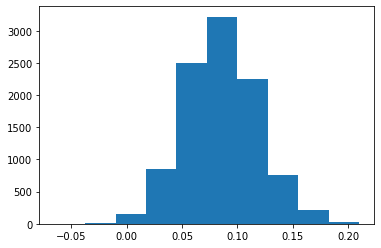

(0.020000000000000462, 0.15000000000000036)

<IPython.core.display.Javascript object>

In [74]:
median_diffs = []
for i in range(10000):
    sample_1 = tv_anime_less_ep["rating"].sample(frac=1.0, replace=True)
    sample_2 = tv_anime_more_ep["rating"].sample(frac=1.0, replace=True)

    median_diff = sample_1.median() - sample_2.median()
    median_diffs.append(median_diff)


plt.hist(median_diffs)
plt.show()

ci_lo = np.percentile(median_diffs, 2.5)
ci_hi = np.percentile(median_diffs, 97.5)

ci_lo, ci_hi

In [46]:
# tv_anime_less_ep = tv_anime[tv_anime["one_season"] == "less"]
# tv_anime_more_ep = tv_anime[tv_anime["one_season"] == "more"]

<IPython.core.display.Javascript object>

In [47]:
# Calculate logarithm to
# base 10 on 'Salary' column
# data["logarithm_base10"] = np.log10(data["Salary"])

<IPython.core.display.Javascript object>

Considerations: how to consider anime containing the same name like Gintama° and Gintama&#039;
wich both have similar data except for: anime_id, name, rating, and members. Also, for a more in-depth and insightful analysis one can talke a look at the non-numerical data: genre, type, members.